# Mini-Lab: Logistic Regression and SVMs (Modeling)

__Team Members__
- Name 1: Jorge Olmos
- Name 2: Bosang Yun
- Name 3: Yucheol Shin
- Name 4: Siu Wai Yeung

In [5]:
import pandas as pd
import numpy as np

hotel_bookings = pd.read_csv('hotel_bookings.csv') # read in the csv file
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Data Importing and Cleaning

In [24]:
import math

hotel_bookings_transform = hotel_bookings
hotel_bookings_transform= hotel_bookings_transform.drop(columns=['agent','company', 'country'])

hotel_bookings_transform['meal']= hotel_bookings_transform['meal'].apply(lambda x: 'SC' if  x == 'Undefined'  else x)
hotel_bookings_transform['children']= hotel_bookings_transform['children'].apply(lambda x: 0 if  math.isnan(x)  else x)
hotel_bookings_transform['market_segment']= hotel_bookings_transform['market_segment'].apply(lambda x: 'Online TA' if  x == 'Undefined'  else x)
hotel_bookings_transform['distribution_channel']= hotel_bookings_transform['distribution_channel'].apply(lambda x: 'TA/TO' if  x == 'Undefined'  else x)


hotel_bookings_transform['hotel']=hotel_bookings_transform['hotel'].astype('category').cat.codes
hotel_bookings_transform['market_segment']=hotel_bookings_transform['market_segment'].astype('category').cat.codes
hotel_bookings_transform['meal']=hotel_bookings_transform['meal'].astype('category').cat.codes
hotel_bookings_transform['reservation_status']=hotel_bookings_transform['reservation_status'].astype('category').cat.codes
hotel_bookings_transform['distribution_channel']=hotel_bookings_transform['distribution_channel'].astype('category').cat.codes
hotel_bookings_transform['reserved_room_type']=hotel_bookings_transform['reserved_room_type'].astype('category').cat.codes
hotel_bookings_transform['assigned_room_type']=hotel_bookings_transform['assigned_room_type'].astype('category').cat.codes
hotel_bookings_transform['deposit_type']=hotel_bookings_transform['deposit_type'].astype('category').cat.codes
hotel_bookings_transform['customer_type']=hotel_bookings_transform['customer_type'].astype('category').cat.codes

assign_month = {"arrival_date_month": {"January": 1, "February": 2, "March": 3, "April": 4,"May": 5,"June": 6,"July": 7,"August": 8,"September": 9,"October": 10,"November": 11,"December": 12}}
hotel_bookings_transform = hotel_bookings_transform.replace(assign_month)

# Convert Date to Ordinal
import datetime as dt
hotel_bookings_transform['reservation_status_date'] = pd.to_datetime(hotel_bookings_transform['reservation_status_date'])
hotel_bookings_transform['reservation_status_date'] = hotel_bookings_transform['reservation_status_date'].map(dt.datetime.toordinal)

# Select modeling techniques

In [ ]:
## todo:

# Generate test design: 

## Normalization

- SVM tries to maximize the distance between the support vectors and the separating plane. 
- Prior to conducting SVM, we need to normalize the dataset so we can get rid of bias and dominance of certain features over others. 
- The result of applying normalized dataset will be having the same influence on the distance metric, thus boosting the accuracy of the model. 

In [116]:
X=hotel_bookings_transform.drop(columns=['is_canceled','reservation_status','meal'])
y=hotel_bookings_transform.is_canceled
columns = X.columns

In [117]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
scaler

scaler.mean_
scaler.scale_

X_scaled = pd.DataFrame(scaler.transform(X),columns=columns)

Verifying each feature has a mean of zero:

In [118]:
X_scaled.mean(axis=0)

hotel                            -2.148285e-13
lead_time                         3.358325e-16
arrival_date_year                 7.194355e-14
arrival_date_month               -1.221612e-14
arrival_date_week_number          4.093983e-15
arrival_date_day_of_month        -9.159196e-16
stays_in_weekend_nights           3.928971e-14
stays_in_week_nights             -2.182022e-14
adults                            5.708995e-15
children                         -6.989886e-16
babies                            5.955017e-15
market_segment                    4.484909e-15
distribution_channel              2.185129e-14
is_repeated_guest                -3.493540e-14
previous_cancellations            1.741766e-14
previous_bookings_not_canceled   -1.286381e-15
reserved_room_type                1.246924e-13
assigned_room_type                9.462049e-14
booking_changes                  -7.015186e-14
deposit_type                      1.754553e-13
days_in_waiting_list             -1.846956e-14
customer_type

Verifying that the standard deviation should be 1:

In [119]:
X_scaled.std(axis=0)

hotel                             1.000004
lead_time                         1.000004
arrival_date_year                 1.000004
arrival_date_month                1.000004
arrival_date_week_number          1.000004
arrival_date_day_of_month         1.000004
stays_in_weekend_nights           1.000004
stays_in_week_nights              1.000004
adults                            1.000004
children                          1.000004
babies                            1.000004
market_segment                    1.000004
distribution_channel              1.000004
is_repeated_guest                 1.000004
previous_cancellations            1.000004
previous_bookings_not_canceled    1.000004
reserved_room_type                1.000004
assigned_room_type                1.000004
booking_changes                   1.000004
deposit_type                      1.000004
days_in_waiting_list              1.000004
customer_type                     1.000004
adr                               1.000004
required_ca

## Feature Selection 

Running initial model to select best parameters to be used for RFE selection:

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit

#cv = ShuffleSplit(n_splits=10, test_size=0.10, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2,random_state=10)

regEstimator = LogisticRegression()

parameters = { 'penalty':['l2']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'class_weight': ['balanced','none']
              ,'random_state': [10]
              ,'solver': ['lbfgs']
              ,'max_iter':[500,1000]
             }


from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=regEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , scoring='accuracy')

regGridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   13.7s
[Parallel(n_jobs=8)]: Done 140 out of 140 | elapsed:  2.3min finished


GridSearchCV(estimator=LogisticRegression(), n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', 'none'],
                         'max_iter': [500, 1000], 'penalty': ['l2'],
                         'random_state': [10], 'solver': ['lbfgs']},
             scoring='accuracy', verbose=1)

### RFE Selection

In [125]:
from sklearn.feature_selection import RFECV

#Create a regression estimator with best parameters for cross validation
classifierEst = regGridSearch.best_estimator_

#for loop
rfecv = RFECV(estimator=classifierEst, step=1, scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(estimator=LogisticRegression(C=1000, class_weight='balanced',
                                   max_iter=500, random_state=10),
      scoring='accuracy')

Here we're examining the plot of the categorical values of interest and looking at the optimal number of features:

Optimal number of features : 14


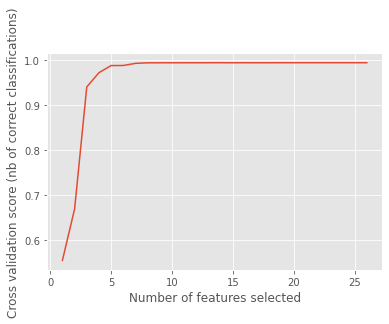

In [185]:
# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [186]:
#Plot the RFE Rankings
plt.style.use('ggplot')

rfe_ft_imp_df = pd.DataFrame({'feature_names':X_scaled.columns, 'weights':rfecv.grid_scores_})
rfe_ft_imp_df.sort_values(by='weights', inplace=True, ascending=False )

top_features = rfe_ft_imp_df.head(50)

top_features

,feature_names,weights
13,is_repeated_guest,0.993760
21,customer_type,0.993739
23,required_car_parking_spaces,0.993739
22,adr,0.993729
20,days_in_waiting_list,0.993729
25,reservation_status_date,0.993729
24,total_of_special_requests,0.993718
19,deposit_type,0.993718
18,booking_changes,0.993697
15,previous_bookings_not_canceled,0.993697


## Cross Validation

In [164]:
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt


X_sel = X_scaled[['is_repeated_guest',
'customer_type',
'adr',
'days_in_waiting_list',
'reservation_status_date',
'total_of_special_requests',
'deposit_type',
'booking_changes',
'previous_bookings_not_canceled',
'distribution_channel',
'assigned_room_type',
'market_segment',
'babies',
'adults',
'previous_cancellations',
'children',
'reserved_room_type',
'stays_in_week_nights',
'stays_in_weekend_nights']]






X_train, X_test, y_train, y_test = train_test_split(X_sel, y,test_size=0.2,random_state=10)

# trainSet = []
# testSet = []

# for train, test in cv.split(X_scaled,y):
#     trainSet.append(train)
#     testSet.append(test)

# Build model

To build our model, after analyzing our feature selection we decided to keep all features that had weights greater than .9

## Logistic Regression 

Doing f1 scoring, which is best for a binary target like is_canceled

In [147]:
from sklearn.linear_model import LogisticRegression
regEstimator = LogisticRegression()


tuning_parameters = { 'penalty':['l2']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'class_weight': ['balanced', 'none']
              ,'random_state': [10] 
              ,'solver': ['lbfgs']
              ,'max_iter':[100,500]
             }


#Doing f1 for accuracy best for binary

#Create a grid search object using the  

from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=regEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=tuning_parameters
                   , scoring='f1')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_train, y_train)

means = regGridSearch.cv_results_['mean_test_score']
stds = regGridSearch.cv_results_['std_test_score']

y_true, y_pred = y_test, regGridSearch.predict(X_test)
print(classification_report(y_true, y_pred))

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=8)]: Done 140 out of 140 | elapsed:   31.0s finished


              precision    recall  f1-score   support

           0       0.83      0.81      0.82     15017
           1       0.68      0.71      0.70      8861

    accuracy                           0.77     23878
   macro avg       0.76      0.76      0.76     23878
weighted avg       0.77      0.77      0.77     23878



In [148]:
 regGridSearch.best_params_

{'C': 1000,
 'class_weight': 'balanced',
 'max_iter': 100,
 'penalty': 'l2',
 'random_state': 10,
 'solver': 'lbfgs'}

In [149]:
regGridSearch.best_score_

0.6985156542579775

In [151]:
 regGridSearch.best_estimator_.intercept_

array([-1.98345761])

In [152]:
regGridSearch.best_estimator_.coef_

array([[-1.18217250e-01,  4.12023138e-02, -8.54541277e+00,
         2.30660999e-01, -2.13266473e-03, -1.45115590e-01,
        -4.59284114e-01,  1.55367980e+00, -2.03472077e-01,
        -5.30910500e-01, -2.78059616e-01, -1.01981959e+00,
         6.93935042e-01,  1.48839296e-02,  1.12123893e-01,
         2.23366725e+00,  9.26309489e-02,  8.47056043e-01,
         1.09320952e-01,  3.62589420e-02]])

In [136]:
X_train.shape

(95512, 26)

## Support Vector Machines

In [168]:
X_train.sample(frac=0.1, replace=False, random_state=10)

,is_repeated_guest,customer_type,adr,days_in_waiting_list,reservation_status_date,total_of_special_requests,deposit_type,booking_changes,previous_bookings_not_canceled,distribution_channel,assigned_room_type,market_segment,babies,adults,previous_cancellations,children,reserved_room_type,stays_in_week_nights,stays_in_weekend_nights
41801,-0.18156,1.495010,-0.788180,-0.131924,-1.509427,-0.720694,-0.373175,-0.338990,-0.091555,0.456981,-0.707596,-0.732679,-0.081579,0.247897,-0.103180,-0.260659,-0.582996,-0.786207,0.072502
115423,-0.18156,-0.237979,0.755287,-0.131924,1.487466,-0.720694,-0.373175,1.194040,-0.091555,0.456981,-0.707596,0.846227,-0.081579,0.247897,-0.103180,-0.260659,-0.582996,-0.262174,-0.928890
59574,-0.18156,-0.237979,-0.135174,-0.131924,0.348908,0.540666,2.614780,-0.338990,-0.091555,0.456981,-0.175329,0.056774,-0.081579,0.247897,-0.103180,-0.260659,0.006183,-0.786207,1.073895
93074,-0.18156,1.495010,0.201222,-0.131924,-0.056785,0.540666,-0.373175,-0.338990,-0.091555,0.456981,-0.707596,0.056774,-0.081579,0.247897,-0.103180,-0.260659,-0.582996,0.261858,-0.928890
105237,-0.18156,-0.237979,-0.254298,-0.131924,0.820035,1.802026,-0.373175,2.727071,-0.091555,0.456981,-0.707596,0.846227,-0.081579,0.247897,-0.103180,-0.260659,-0.582996,2.357989,1.073895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37837,-0.18156,-0.237979,0.036981,-0.131924,1.465654,-0.720694,-0.373175,-0.338990,-0.091555,0.456981,1.421475,0.056774,-0.081579,0.247897,-0.103180,-0.260659,1.773723,1.309924,1.073895
81744,-0.18156,-0.237979,-0.530935,2.368837,-0.981590,-0.720694,2.614780,-0.338990,-0.091555,0.456981,-0.707596,0.056774,-0.081579,0.247897,7.003023,-0.260659,-0.582996,0.261858,-0.928890
42345,-0.18156,-0.237979,-0.788180,-0.131924,-1.618484,-0.720694,2.614780,-0.338990,-0.091555,0.456981,-0.707596,-0.732679,-0.081579,0.247897,-0.103180,-0.260659,-0.582996,-0.786207,0.072502
27899,-0.18156,-0.237979,0.557407,-0.131924,0.200590,0.540666,-0.373175,-0.338990,-0.091555,0.456981,-0.707596,0.846227,-0.081579,0.247897,-0.103180,-0.260659,-0.582996,0.261858,1.073895


In [167]:
#Todo: use sample and get support vectors


from sklearn.svm import SVC

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf



X_train_sub = X_train[[
    'is_repeated_guest',
    'customer_type',
    'adr',
    'days_in_waiting_list',
    'reservation_status_date']]





svm_estimator = svm.SVC() # Linear Kernel


# {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]}
tuned_parameters = [
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


svmGridSearch = GridSearchCV(estimator=svm_estimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=tuned_parameters
                   , scoring='f1')

svmGridSearch.fit(X_train_sub, y_train)

means = svmGridSearch.cv_results_['mean_test_score']
stds = svmGridSearch.cv_results_['std_test_score']


y_true, y_pred = y_test, svmGridSearch.predict(X_test)
print(classification_report(y_true, y_pred))






# grid = {
#     'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
#     'max_iter': [1000], # number of epochs
#     'loss': ['log'], # logistic regression,
#     'penalty': ['l2'],
#     'n_jobs': [-1]
# }
# paramGrid = ParameterGrid(grid)

# bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, paramGrid,
#            X_train, y_train, X_test, y_test, 
#            metric = roc_auc_score, greater_is_better=True,
#            scoreLabel = "AUC")



#print(bestModel, bestScore)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report



tuned_parameters =  [{
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'max_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1],
    'random_state':[10]
}]



log_estimator = SGDClassifier()

logGridSearch = GridSearchCV(estimator=log_estimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=tuned_parameters
                   , scoring='f1')

logGridSearch.fit(X_train, y_train)

means = logGridSearch.cv_results_['mean_test_score']
stds = logGridSearch.cv_results_['std_test_score']

y_true, y_pred = y_test, logGridSearch.predict(X_test)
print(classification_report(y_true, y_pred))


In [170]:
 logGridSearch.best_params_

{'alpha': 0.0001,
 'loss': 'log',
 'max_iter': 1000,
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 10}

In [184]:
from sklearn.metrics import classification_report



tuned_parameters =  [{
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'max_iter': [1000], # number of epochs
    'loss': ['hinge'], # svm,
    'penalty': ['l2'],
    'n_jobs': [-1],
    'random_state':[10]
}]



svm_estimator = SGDClassifier()

svmGridSearch = GridSearchCV(estimator=svm_estimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=tuned_parameters
                   , scoring='f1')

svmGridSearch.fit(X_train, y_train)

means = svmGridSearch.cv_results_['mean_test_score']
stds = svmGridSearch.cv_results_['std_test_score']

y_true, y_pred = y_test, svmGridSearch.predict(X_test)
print(classification_report(y_true, y_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    3.3s finished


              precision    recall  f1-score   support

           0       0.73      1.00      0.84     15017
           1       0.98      0.38      0.55      8861

    accuracy                           0.77     23878
   macro avg       0.86      0.69      0.70     23878
weighted avg       0.82      0.77      0.73     23878



In [178]:
 svmGridSearch.best_params_

{'alpha': 0.0001,
 'loss': 'hinge',
 'max_iter': 1000,
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 10}

In [179]:
 svmGridSearch.best_estimator_

SGDClassifier(n_jobs=-1, random_state=10)

In [181]:
svmGridSearch.best_estimator_.coef_

array([[-3.56305517e-03,  2.36707960e-02,  6.59604562e-03,
        -3.12169054e-02, -5.76158594e-02, -6.36507896e-02,
         7.64737169e-01, -1.16667405e-02, -8.44919388e-01,
        -3.42802603e-02, -5.91503930e-02,  1.30220214e-01,
        -1.60096259e-03,  4.86489129e-03,  1.74892981e+00,
         2.77110871e-02,  7.72042263e-02,  6.51285659e-02,
         1.45241329e-02]])

# Assess model